In [70]:
import pandas as pd
from matplotlib_venn import venn2, venn2_unweighted, venn3, venn3_unweighted
from matplotlib import pyplot as plt

%matplotlib inline

## RareDisease-Drug: EMA/FDA - Su Lab overlap 

Rare disease designations:
fda # rd: 2315
ema # rd: 525
su # rd: 398
fda # doid: 269
ema # doid: 190
fda + ema # doid: 333
su # doid: 320
fda/ema-su overlap: 107


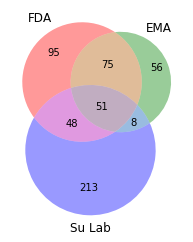

In [74]:
su_df = pd.read_table('/home/nuria/SuLab/Repurposing/Drug-RareDisease/mike_mmc2_final.csv', sep=',')
fda_df = pd.read_table('/home/nuria/SuLab/Repurposing/Drug-RareDisease/fda_orphan_match.csv', sep=',')
ema_df = pd.read_table('/home/nuria/SuLab/Repurposing/Drug-RareDisease/eu_orphan_match.csv', sep=',')

# indications overlap
fda_df['do'] = fda_df['doid'].str.split('_').str[1]
fda_df[['doid','do']].head(5)
ema_df['do'] = ema_df['doid'].str.split('_').str[1]
ema_df[['doid','do']].head()
su_df['do'] = su_df['doid'].str.split(':').str[1]
su_df[['doid','do']].head()
fda = set(fda_df.do)
ema = set(ema_df.do)
su = set(su_df.do)
print('Rare disease designations:')
print('fda # rd: {}'.format(len(set(fda_df.indication))))
print('ema # rd: {}'.format(len(set(ema_df.indication))))
print('su # rd: {}'.format(len(set(su_df.ind))))
print('fda # doid: {}'.format(len(fda)))
print('ema # doid: {}'.format(len(ema)))
print('fda + ema # doid: {}'.format(len(ema | fda)))
print('su # doid: {}'.format(len(su)))
print('fda/ema-su overlap: {}'.format(len((fda | ema) & su)))
venn3([fda,ema,su],('FDA', 'EMA', 'Su Lab'))
plt.show()

In [ ]:
# drug-indications relations overlap

## HPO MESH content 2016 - 2017 overlap

Mappings:
overlap: 958


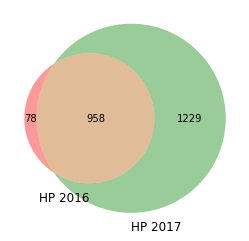

HP terms:
overlap: 974


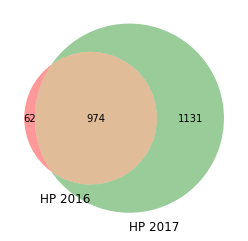

MeSH terms:
overlap: 965


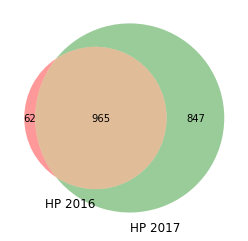

In [75]:
hp16_df = pd.read_table('/home/nuria/workspace/repurposing-hetio/rephetio-dhimmelstein/hetionet+hpo/data-JAN2016/hp-hp2mesh-mappings.tsv')
hp16_df.head(2)
hp17_df = pd.read_table('/home/nuria/workspace/repurposing-hetio/rephetio-dhimmelstein/hetionet+hpo/data/hp-hp2mesh-mappings.tsv')
hp17_df.head(2)
hp16_df['ass'] = hp16_df.loc[:,['hp_code','mesh_code']].apply(lambda x: '-'.join(x), axis=1)
hp17_df['ass'] = hp17_df.loc[:,['hp_code','mesh_code']].apply(lambda x: '-'.join(x), axis=1)
hp16 = set(hp16_df.ass)
hp17 = set(hp17_df.ass)
print('Mappings:')
print('overlap: {}'.format(len(hp16 & hp17)))
venn2([hp16,hp17],('HP 2016','HP 2017'))
plt.show()
hp16 = set(hp16_df.hp_code)
hp17 = set(hp17_df.hp_code)
print('HP terms:')
print('overlap: {}'.format(len(hp16 & hp17)))
venn2([hp16,hp17],('HP 2016','HP 2017'))
plt.show()
hp16 = set(hp16_df.mesh_code)
hp17 = set(hp17_df.mesh_code)
print('MeSH terms:')
print('overlap: {}'.format(len(hp16 & hp17)))
venn2([hp16,hp17],('HP 2016','HP 2017'))
plt.show()